In [1]:
#!pip install pandas scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
github_location = "https://github.com/enveda/modbioterp-enveda/raw/refs/heads/main/"
#data_folder = "content"
data_folder = "/home/antonio.gomes/modbioterp-enveda/workshop_data"
PDB_FILE_LOCATION = f"{github_location}/workshop_data/cotb2_pp_mg.pdb"
#!wget $PDB_FILE_LOCATION -O /content/cotb2_pp_mg.pdb
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [4]:
%matplotlib inline

energies = f"{github_location}/workshop_data/lig_1_energy.txt"
loaded_ligands = pd.read_csv(energies, header = None, sep=" ")
loaded_ligands.columns = ["ligand", "energy"]
labels = loaded_ligands.energy

In [5]:
data_for_ML = pd.read_parquet(f"{data_folder}/data_for_ML.parquet")
data_for_ML.head(5)
# Generate 3d descriptors using rdkit for all 10000 molecules

,PMI1,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,...,blosum62_6151,blosum62_6152,blosum62_6153,blosum62_6154,blosum62_6155,blosum62_6156,blosum62_6157,blosum62_6158,blosum62_6159,blosum62_6160
0,858.038436,1583.425000,2184.329171,0.392816,0.724902,3.102941,0.000845,0.919617,0.247343,0.166761,...,-1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-3.0,-2.0,0.0
1,849.158235,1572.291482,2074.488795,0.409334,0.757918,3.059078,0.000893,0.912385,0.225252,0.231516,...,-1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-3.0,-2.0,0.0
2,790.542596,1615.008980,2102.130286,0.376067,0.768273,3.063071,0.000972,0.926592,0.259586,0.201936,...,-1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-3.0,-2.0,0.0
3,882.532834,1438.458730,2037.900117,0.433060,0.705853,3.012094,0.000800,0.901365,0.210870,0.194837,...,-1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-3.0,-2.0,0.0
4,776.232018,1621.679340,2083.545226,0.372553,0.778327,3.054148,0.001003,0.928011,0.262621,0.210445,...,-1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-3.0,-2.0,0.0


In [14]:
correlations_list = []
for x in data_for_ML.columns:
    correlation = data_for_ML[x].corr(labels)
    correlations_list.append({"feature": x, "correlation": correlation})
correlations_df = pd.DataFrame(correlations_list)

/home/antonio.gomes/enzyme-ml/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/antonio.gomes/enzyme-ml/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [24]:
correlations_df.sort_values(by="correlation", ascending=False, inplace=True)
top_correlated_feature = correlations_df.head(1)

Text(0.5, 1.0, 'NPR1 vs energy\nCorrelation: 0.21')

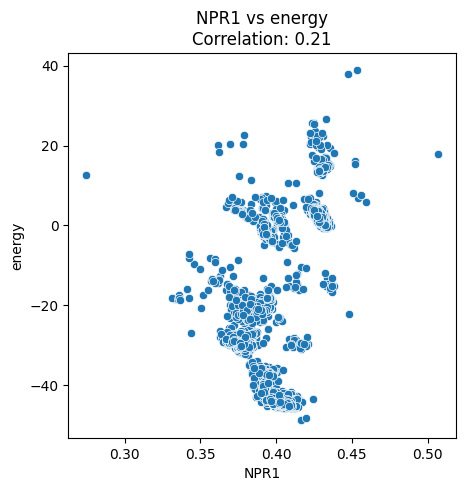

In [25]:

plt.figure(figsize=(5, 5))
sns.scatterplot(x = data_for_ML[top_correlated_feature["feature"].values[0]], y = labels)
plt.title(f"{top_correlated_feature['feature'].values[0]} vs energy\nCorrelation: {top_correlated_feature['correlation'].values[0]:.2f}")

